# Group 8 Final: Chicago Taxi Data

#### Teammate 1, Teammate 2, Teammate 3, Robby Konrath, Teammate 5

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import datetime
import json
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df=pd.read_csv("chicago_taxi_trips_2016_01.csv")
df2=pd.read_csv("chicago_taxi_trips_2016_02.csv")
df3=pd.read_csv("chicago_taxi_trips_2016_03.csv")
df4=pd.read_csv("chicago_taxi_trips_2016_04.csv")
df5=pd.read_csv("chicago_taxi_trips_2016_05.csv")
df6=pd.read_csv("chicago_taxi_trips_2016_06.csv")
df7=pd.read_csv("chicago_taxi_trips_2016_07.csv")
df8=pd.read_csv("chicago_taxi_trips_2016_08.csv")
df9=pd.read_csv("chicago_taxi_trips_2016_09.csv")
df10=pd.read_csv("chicago_taxi_trips_2016_10.csv")
df11=pd.read_csv("chicago_taxi_trips_2016_11.csv")
df12=pd.read_csv("chicago_taxi_trips_2016_12.csv")
#data set came with twelve months so opened all 
#takes a couple minutes

In [3]:
#DON'T RUN
df=df.append(df2,ignore_index=True)
df=df.append(df3,ignore_index=True)
df=df.append(df4,ignore_index=True)
df=df.append(df5,ignore_index=True)
df=df.append(df6,ignore_index=True)
df=df.append(df7,ignore_index=True)
df=df.append(df8,ignore_index=True)
df=df.append(df9,ignore_index=True)
df=df.append(df10,ignore_index=True)
df=df.append(df11,ignore_index=True)
df=df.append(df12,ignore_index=True)
#added them all together
#also takes a couple minutes
#DON"T RUN unless you really want to wait a while and slow your computer for a long time, just open the clean later

In [4]:
newdf=df.sample(frac=.1,random_state=0)
#took a 10% sample size because 20 million rows is too slow to work with in Juypter, but 2 million is fast enough

In [10]:
newdf=pd.read_csv('sampledatabeforeclean.csv')
#if you don't want to run the whole append and want the date before cleaning

## Data Description

<ol>
<li><b>taxi_id</b>: identification number of taxi</li> 
<li><b>trip_start_timestamp</b>: time taxi driver begins trip for passenger</li>
<li><b>trip_end_timestamp</b>: time taxi driver ends trip for passenger</li>
<li><b>trip_seconds</b>: total time of trip counted in seconds for passenger</li>
<li><b>trip_miles</b>: total miles traveled during trip for passenger</li>
<li><b>pickup_community_area</b>: specialized community area where passenger picked up</li>
<li><b>dropoff_community_area</b>: specialized community area where passenger dropped off up</li>
<li><b>fare</b>: amount to go from point a to b</li>
<li><b>tips</b>: amount passenger tipped taxi driver</li>
<li><b>tolls</b>: extra toll payments</li>
<li><b>extras</b>: extra money spent by passenger for taxi ride</li>
<li><b>trip_total</b>: total amount passenger spent on taxi ride</li>
<li><b>payment_type</b>: payment method of customer</li>
<li><b>company</b>: company taxi driver works for</li>
<li><b>pickup_lattitude</b>: pickup destination lattitude point</li>
<li><b>pickup_longitude</b>: pickup destination longitude point</li>
<li><b>dropoff_lattitude</b>: dropoff destination lattitude point</li>
<li><b>dropoff_longitude</b>: dropoff destination longitude point</li>
</ol>


In [5]:
newdf.shape

(1986616, 20)

In [6]:
newdf.isna().sum()

taxi_id                       283
trip_start_timestamp            0
trip_end_timestamp            250
trip_seconds                  329
trip_miles                     22
pickup_census_tract       1986616
dropoff_census_tract       772817
pickup_community_area      275671
dropoff_community_area     308533
fare                           30
tips                           30
tolls                          30
extras                         30
trip_total                     30
payment_type                    0
company                    763833
pickup_latitude            275629
pickup_longitude           275629
dropoff_latitude           304747
dropoff_longitude          304747
dtype: int64

In [7]:
newdf.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
2615738,4016.0,2016-2-13 17:15:00,2016-2-13 17:45:00,1080.0,2.8,NaN,807.0,8.0,28.0,12.75,2.0,0.0,1.0,15.75,Credit Card,NaN,210.0,470.0,411.0,545.0
11107382,4387.0,2016-6-16 20:30:00,2016-6-16 20:30:00,300.0,0.5,NaN,1101.0,24.0,24.0,5.00,0.0,0.0,1.0,6.00,Cash,NaN,255.0,300.0,753.0,551.0
12285774,4865.0,2016-7-14 15:45:00,2016-7-14 16:15:00,2340.0,11.0,NaN,960.0,28.0,56.0,30.50,6.2,0.0,0.0,37.20,Credit Card,NaN,411.0,545.0,433.0,757.0
4176652,727.0,2016-3-14 03:00:00,2016-3-14 03:00:00,420.0,0.0,NaN,NaN,6.0,3.0,7.50,0.0,0.0,1.5,9.00,Cash,107.0,686.0,500.0,660.0,120.0
18263903,2452.0,2016-11-16 21:15:00,2016-11-16 21:15:00,600.0,1.6,NaN,NaN,NaN,NaN,8.25,3.0,0.0,1.0,12.25,Credit Card,43.0,NaN,NaN,NaN,NaN


In [11]:
newdf.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,4016.0,2016-2-13 17:15:00,2016-2-13 17:45:00,1080.0,2.8,NaN,807.0,8.0,28.0,12.75,2.0,0.0,1.0,15.75,Credit Card,NaN,210.0,470.0,411.0,545.0
1,4387.0,2016-6-16 20:30:00,2016-6-16 20:30:00,300.0,0.5,NaN,1101.0,24.0,24.0,5.00,0.0,0.0,1.0,6.00,Cash,NaN,255.0,300.0,753.0,551.0
2,4865.0,2016-7-14 15:45:00,2016-7-14 16:15:00,2340.0,11.0,NaN,960.0,28.0,56.0,30.50,6.2,0.0,0.0,37.20,Credit Card,NaN,411.0,545.0,433.0,757.0
3,727.0,2016-3-14 03:00:00,2016-3-14 03:00:00,420.0,0.0,NaN,NaN,6.0,3.0,7.50,0.0,0.0,1.5,9.00,Cash,107.0,686.0,500.0,660.0,120.0
4,2452.0,2016-11-16 21:15:00,2016-11-16 21:15:00,600.0,1.6,NaN,NaN,NaN,NaN,8.25,3.0,0.0,1.0,12.25,Credit Card,43.0,NaN,NaN,NaN,NaN


# Data Cleanup

In [12]:
newdf=newdf.drop(columns={'pickup_census_tract','dropoff_census_tract'})
#drop these two columns because one is all nan

In [13]:
faremean=newdf.fare.mean()
newdf.fare.fillna(value=faremean,inplace=True)
tipsmean=newdf.tips.mean()
tollsmean=newdf.tolls.mean()
milesmean=newdf.trip_miles.mean()
secondsmean=newdf.trip_seconds.mean()
extrasmean=newdf.extras.mean()
newdf.tips.fillna(value=tipsmean,inplace=True)
newdf.tolls.fillna(value=tollsmean,inplace=True)
newdf.trip_miles.fillna(value=milesmean,inplace=True)
newdf.trip_seconds.fillna(value=secondsmean,inplace=True)
newdf.extras.fillna(value=extrasmean,inplace=True)
totalmean=newdf.trip_total.mean()
newdf.trip_total.fillna(value=totalmean,inplace=True)
#fill in the few missing numerical values with averages


In [14]:
newdf.isna().sum()

taxi_id                      283
trip_start_timestamp           0
trip_end_timestamp           250
trip_seconds                   0
trip_miles                     0
pickup_community_area     275671
dropoff_community_area    308533
fare                           0
tips                           0
tolls                          0
extras                         0
trip_total                     0
payment_type                   0
company                   763833
pickup_latitude           275629
pickup_longitude          275629
dropoff_latitude          304747
dropoff_longitude         304747
dtype: int64

In [15]:
list=[]
for x in newdf[newdf.trip_end_timestamp.isna()].trip_start_timestamp.values:
    y=datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S")+datetime.timedelta(0,newdf.trip_seconds.mean())
    y=y.strftime("%Y-%m-%d %H:%M:%S")
    list.append(y)
dfchange=newdf[newdf.trip_end_timestamp.isna()].copy()
dfchange.trip_end_timestamp=list
#create a new df that fills in the few missing end times by adding the average seconds to the start date.
#the timestamps in the whole df are not exactly accurate to the trip seconds per row. They are just rounded to the nearest 15 min mark

In [16]:
dfchange.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
7029,1445.0,2016-4-21 17:45:00,2016-04-21 17:57:47,767.551123,0.0,28.0,NaN,0.0,0.0,0.0,0.0,0.0,Unknown,101.0,411.0,545.0,NaN,NaN
34833,7517.0,2016-3-14 15:30:00,2016-03-14 15:42:47,767.551123,0.0,6.0,NaN,0.0,0.0,0.0,0.0,0.0,Unknown,8.0,686.0,500.0,NaN,NaN
38135,7099.0,2016-6-29 20:30:00,2016-06-29 20:42:47,767.551123,0.0,59.0,NaN,0.0,0.0,0.0,0.0,0.0,Unknown,82.0,376.0,92.0,NaN,NaN
40024,6966.0,2016-4-20 01:15:00,2016-04-20 01:27:47,767.551123,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Unknown,8.0,NaN,NaN,NaN,NaN
43994,1603.0,2016-8-21 21:00:00,2016-08-21 21:12:47,767.551123,0.0,56.0,NaN,0.0,0.0,0.0,0.0,0.0,Unknown,43.0,433.0,757.0,NaN,NaN


In [17]:
dfcopy=newdf.copy()
dfcopy.dropna(subset=['trip_end_timestamp'],axis=0,inplace=True)
dfcopy=dfcopy.append(dfchange)
#added on these changed nans to the bottom of the df and dropped the nans as they were

In [18]:
dfcopy.isna().sum()

taxi_id                      283
trip_start_timestamp           0
trip_end_timestamp             0
trip_seconds                   0
trip_miles                     0
pickup_community_area     275671
dropoff_community_area    308533
fare                           0
tips                           0
tolls                          0
extras                         0
trip_total                     0
payment_type                   0
company                   763833
pickup_latitude           275629
pickup_longitude          275629
dropoff_latitude          304747
dropoff_longitude         304747
dtype: int64

In [19]:
dfcopy.company.fillna(value='Unknown', inplace=True)
dfcopy.pickup_community_area.fillna(value='Unknown',inplace=True)
dfcopy.dropoff_community_area.fillna(value='Unknown',inplace=True)
dfcopy.taxi_id.fillna(value='Unknown',inplace=True)
#fill in columns with categorical values with Unknown
#note taxi_id is not a number but a string, the original value before the owener transformed some data is a very long number that makes no sense so we just kept these numbers as the id name


In [20]:
df=dfcopy.copy()
#change back to df after all these changes

This next part involves changing back some of the values to what they were.
The maker of this dataset created a key in json format for company names and 
latitude and longitude values. This next part involves making them their actual correct values. They also had one for taxi_ids but the format was terrible 
so we stuck with string numbers to represent them

In [21]:
df.head()
#as you can see company is numerical and longitude and latitude don't make any sense because they are all located around chicago

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,4016,2016-2-13 17:15:00,2016-2-13 17:45:00,1080.0,2.8,8,28,12.75,2.0,0.0,1.0,15.75,Credit Card,Unknown,210.0,470.0,411.0,545.0
1,4387,2016-6-16 20:30:00,2016-6-16 20:30:00,300.0,0.5,24,24,5.00,0.0,0.0,1.0,6.00,Cash,Unknown,255.0,300.0,753.0,551.0
2,4865,2016-7-14 15:45:00,2016-7-14 16:15:00,2340.0,11.0,28,56,30.50,6.2,0.0,0.0,37.20,Credit Card,Unknown,411.0,545.0,433.0,757.0
3,727,2016-3-14 03:00:00,2016-3-14 03:00:00,420.0,0.0,6,3,7.50,0.0,0.0,1.5,9.00,Cash,107,686.0,500.0,660.0,120.0
4,2452,2016-11-16 21:15:00,2016-11-16 21:15:00,600.0,1.6,Unknown,Unknown,8.25,3.0,0.0,1.0,12.25,Credit Card,43,NaN,NaN,NaN,NaN


In [22]:
with open("column_remapping.json") as f_open:
    column_id_map = json.load(f_open)
company_id = column_id_map['company']
list=df.company.tolist()
i=-1
for x in list:
    i=i+1
    if x=='Unknown':
        list[i]='10000'
for i in range(len(list)):
    list[i]=int(list[i])
for i in range(len(list)):
    list[i]=str(list[i])
#opens the json data codes for company
#puts the current dataframe's company column into a list
#changes the unknown values already put in the column to an id specifically for that
#changes each number to an int because right now they are floats
#changes the int back to a string to correspond with the json file as they are all string numbers with no decimals

In [23]:
list[0]
#output to match with the json file

'10000'

In [24]:
company_id['0']
#what the json file says for company

'3623-Arrington Enterprises'

In [25]:
i=-1
for x in list:
    i=i+1
    for y in company_id:
        if x==y:
            list[i]=company_id[y]
for i in range(len(list)):
          if list[i]=='10000':
               list[i]='Unknown'

#loops through both the json and the company list and modifies them to the real value
#last loop changes back the 10000 to unknown, which is what it was

In [26]:
list[0]
#final output 

'Unknown'

In [27]:
df.company=list
df.head()
#shows result in df

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,4016,2016-2-13 17:15:00,2016-2-13 17:45:00,1080.0,2.8,8,28,12.75,2.0,0.0,1.0,15.75,Credit Card,Unknown,210.0,470.0,411.0,545.0
1,4387,2016-6-16 20:30:00,2016-6-16 20:30:00,300.0,0.5,24,24,5.00,0.0,0.0,1.0,6.00,Cash,Unknown,255.0,300.0,753.0,551.0
2,4865,2016-7-14 15:45:00,2016-7-14 16:15:00,2340.0,11.0,28,56,30.50,6.2,0.0,0.0,37.20,Credit Card,Unknown,411.0,545.0,433.0,757.0
3,727,2016-3-14 03:00:00,2016-3-14 03:00:00,420.0,0.0,6,3,7.50,0.0,0.0,1.5,9.00,Cash,Taxi Affiliation Services,686.0,500.0,660.0,120.0
4,2452,2016-11-16 21:15:00,2016-11-16 21:15:00,600.0,1.6,Unknown,Unknown,8.25,3.0,0.0,1.0,12.25,Credit Card,Chicago Medallion Leasing INC,NaN,NaN,NaN,NaN


In [28]:
df.pickup_latitude.fillna(value='Unknown',inplace=True)
df.pickup_longitude.fillna(value='Unknown',inplace=True)
df.dropoff_latitude.fillna(value='Unknown',inplace=True)
df.dropoff_longitude.fillna(value='Unknown',inplace=True)
#make these unknown for now just to get their correct values from json file

In [29]:
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,4016,2016-2-13 17:15:00,2016-2-13 17:45:00,1080.0,2.8,8,28,12.75,2.0,0.0,1.0,15.75,Credit Card,Unknown,210,470,411,545
1,4387,2016-6-16 20:30:00,2016-6-16 20:30:00,300.0,0.5,24,24,5.00,0.0,0.0,1.0,6.00,Cash,Unknown,255,300,753,551
2,4865,2016-7-14 15:45:00,2016-7-14 16:15:00,2340.0,11.0,28,56,30.50,6.2,0.0,0.0,37.20,Credit Card,Unknown,411,545,433,757
3,727,2016-3-14 03:00:00,2016-3-14 03:00:00,420.0,0.0,6,3,7.50,0.0,0.0,1.5,9.00,Cash,Taxi Affiliation Services,686,500,660,120
4,2452,2016-11-16 21:15:00,2016-11-16 21:15:00,600.0,1.6,Unknown,Unknown,8.25,3.0,0.0,1.0,12.25,Credit Card,Chicago Medallion Leasing INC,Unknown,Unknown,Unknown,Unknown


### same process is repeated for all four of pickup longitude and latitude and dropoff longitude and latitude

In [30]:
with open("column_remapping.json") as f_open:
    column_id_map = json.load(f_open)
pickup_latitude_id = column_id_map['pickup_latitude']
list2=df.pickup_latitude.tolist()
i=-1
for x in list2:
    i=i+1
    if x=='Unknown':
        list2[i]='10000'
for i in range(len(list2)):
    list2[i]=int(list2[i])
for i in range(len(list2)):
    list2[i]=str(list2[i])
i=-1
for x in list2:
    i=i+1
    for y in pickup_latitude_id:
        if x==y:
            list2[i]=pickup_latitude_id[y]
for i in range(len(list2)):
    list2[i]=float(list2[i])

#same exact process as before so won't explain details again
#except changing final answer from string to float so can graph these eventually
#all in one shot this time

In [31]:
list2[0]

41.892507781

In [32]:
df.pickup_latitude=list2

In [33]:
pickuplatmean=df[df.pickup_latitude!=10000.0].pickup_latitude.mean()

In [34]:
for i in range(len(list2)):
          if list2[i]==10000.0:
               list2[i]=pickuplatmean

In [35]:
list2[0]

41.892507781

In [36]:
df.pickup_latitude=list2

In [37]:
with open("column_remapping.json") as f_open:
    column_id_map = json.load(f_open)
pickup_longitude_id = column_id_map['pickup_longitude']
list3=df.pickup_longitude.tolist()
i=-1
for x in list3:
    i=i+1
    if x=='Unknown':
        list3[i]='10000'
for i in range(len(list3)):
    list3[i]=int(list3[i])
for i in range(len(list3)):
    list3[i]=str(list3[i])
i=-1
for x in list3:
    i=i+1
    for y in pickup_longitude_id:
        if x==y:
            list3[i]=pickup_longitude_id[y]
for i in range(len(list3)):
    list3[i]=float(list3[i])



In [38]:
list3[0]

-87.626214906

In [39]:
df.pickup_longitude=list3

In [40]:
df[df.pickup_longitude!=10000.0].pickup_longitude.mean()

-87.65903175066352

In [41]:
pickuplongmean=df[df.pickup_longitude!=10000.0].pickup_longitude.mean()

In [42]:
for i in range(len(list3)):
          if list3[i]==10000.0:
               list3[i]=pickuplongmean

In [43]:
list3[0]

-87.626214906

In [44]:
df.pickup_longitude=list3

In [45]:
with open("column_remapping.json") as f_open:
    column_id_map = json.load(f_open)
dropoff_longitude_id = column_id_map['dropoff_longitude']
list4=df.dropoff_longitude.tolist()
i=-1
for x in list4:
    i=i+1
    if x=='Unknown':
        list4[i]='10000'
for i in range(len(list4)):
    list4[i]=int(list4[i])
for i in range(len(list4)):
    list4[i]=str(list4[i])
i=-1
for x in list4:
    i=i+1
    for y in dropoff_longitude_id:
        if x==y:
            list4[i]=dropoff_longitude_id[y]
for i in range(len(list4)):
    list4[i]=float(list4[i])



In [46]:
list4[0]

-87.642648998

In [47]:
df.dropoff_longitude=list4

In [48]:
df[df.dropoff_longitude!=10000.0].dropoff_longitude.mean()

-87.65373579490085

In [49]:
dropofflongmean=df[df.dropoff_longitude!=10000.0].dropoff_longitude.mean()

In [50]:
for i in range(len(list4)):
          if list4[i]==10000.0:
               list4[i]=dropofflongmean

In [51]:
list4[0]

-87.642648998

In [52]:
df.dropoff_longitude=list4

In [53]:
with open("column_remapping.json") as f_open:
    column_id_map = json.load(f_open)
dropoff_latitude_id = column_id_map['dropoff_latitude']
list5=df.dropoff_latitude.tolist()
i=-1
for x in list5:
    i=i+1
    if x=='Unknown':
        list5[i]='10000'
for i in range(len(list5)):
    list5[i]=int(list5[i])
for i in range(len(list5)):
    list5[i]=str(list5[i])
i=-1
for x in list5:
    i=i+1
    for y in dropoff_latitude_id:
        if x==y:
            list5[i]=dropoff_latitude_id[y]
for i in range(len(list5)):
    list5[i]=float(list5[i])


In [54]:
list5[0]

41.879255084

In [55]:
df.dropoff_latitude=list5

In [56]:
df[df.dropoff_latitude!=10000.0].dropoff_latitude.mean()

41.900885537721386

In [57]:
dropofflatmean=df[df.dropoff_latitude!=10000.0].dropoff_latitude.mean()

In [58]:
for i in range(len(list5)):
          if list5[i]==10000.0:
               list5[i]=dropofflatmean

In [59]:
list5[0]

41.879255084

In [60]:
df.dropoff_latitude=list5

In [61]:
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,4016,2016-2-13 17:15:00,2016-2-13 17:45:00,1080.0,2.8,8,28,12.75,2.0,0.0,1.0,15.75,Credit Card,Unknown,41.892508,-87.626215,41.879255,-87.642649
1,4387,2016-6-16 20:30:00,2016-6-16 20:30:00,300.0,0.5,24,24,5.00,0.0,0.0,1.0,6.00,Cash,Unknown,41.908379,-87.670945,41.906026,-87.675312
2,4865,2016-7-14 15:45:00,2016-7-14 16:15:00,2340.0,11.0,28,56,30.50,6.2,0.0,0.0,37.20,Credit Card,Unknown,41.879255,-87.642649,41.785999,-87.750934
3,727,2016-3-14 03:00:00,2016-3-14 03:00:00,420.0,0.0,6,3,7.50,0.0,0.0,1.5,9.00,Cash,Taxi Affiliation Services,41.944227,-87.655998,41.965812,-87.655879
4,2452,2016-11-16 21:15:00,2016-11-16 21:15:00,600.0,1.6,Unknown,Unknown,8.25,3.0,0.0,1.0,12.25,Credit Card,Chicago Medallion Leasing INC,41.900879,-87.659032,41.900886,-87.653736


In [189]:
dfbefore.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
2615738,4016,2016-2-13 17:15:00,2016-2-13 17:45:00,1080.0,2.8,8,28,12.75,2.0,0.0,1.0,15.75,Credit Card,Unknown,210,470,411,545
11107382,4387,2016-6-16 20:30:00,2016-6-16 20:30:00,300.0,0.5,24,24,5.00,0.0,0.0,1.0,6.00,Cash,Unknown,255,300,753,551
12285774,4865,2016-7-14 15:45:00,2016-7-14 16:15:00,2340.0,11.0,28,56,30.50,6.2,0.0,0.0,37.20,Credit Card,Unknown,411,545,433,757
4176652,727,2016-3-14 03:00:00,2016-3-14 03:00:00,420.0,0.0,6,3,7.50,0.0,0.0,1.5,9.00,Cash,Taxi Affiliation Services,686,500,660,120
18263903,2452,2016-11-16 21:15:00,2016-11-16 21:15:00,600.0,1.6,Unknown,Unknown,8.25,3.0,0.0,1.0,12.25,Credit Card,Chicago Medallion Leasing INC,Unknown,Unknown,Unknown,Unknown


In [62]:
df.isna().sum()

taxi_id                   0
trip_start_timestamp      0
trip_end_timestamp        0
trip_seconds              0
trip_miles                0
pickup_community_area     0
dropoff_community_area    0
fare                      0
tips                      0
tolls                     0
extras                    0
trip_total                0
payment_type              0
company                   0
pickup_latitude           0
pickup_longitude          0
dropoff_latitude          0
dropoff_longitude         0
dtype: int64

# NaN cleanup finished. Now lets add some new columns to make it easier to find interesting things

In [63]:
df[['date_start','time_start']]=df.trip_start_timestamp.str.split(" ",expand=True)

In [64]:
df[['date_end','time_end']]=df.trip_end_timestamp.str.split(" ",expand=True)

In [65]:
df.head()
#split up the timestamps into separate dates and times

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,...,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,date_start,time_start,date_end,time_end
0,4016,2016-2-13 17:15:00,2016-2-13 17:45:00,1080.0,2.8,8,28,12.75,2.0,0.0,...,Credit Card,Unknown,41.892508,-87.626215,41.879255,-87.642649,2016-2-13,17:15:00,2016-2-13,17:45:00
1,4387,2016-6-16 20:30:00,2016-6-16 20:30:00,300.0,0.5,24,24,5.00,0.0,0.0,...,Cash,Unknown,41.908379,-87.670945,41.906026,-87.675312,2016-6-16,20:30:00,2016-6-16,20:30:00
2,4865,2016-7-14 15:45:00,2016-7-14 16:15:00,2340.0,11.0,28,56,30.50,6.2,0.0,...,Credit Card,Unknown,41.879255,-87.642649,41.785999,-87.750934,2016-7-14,15:45:00,2016-7-14,16:15:00
3,727,2016-3-14 03:00:00,2016-3-14 03:00:00,420.0,0.0,6,3,7.50,0.0,0.0,...,Cash,Taxi Affiliation Services,41.944227,-87.655998,41.965812,-87.655879,2016-3-14,03:00:00,2016-3-14,03:00:00
4,2452,2016-11-16 21:15:00,2016-11-16 21:15:00,600.0,1.6,Unknown,Unknown,8.25,3.0,0.0,...,Credit Card,Chicago Medallion Leasing INC,41.900879,-87.659032,41.900886,-87.653736,2016-11-16,21:15:00,2016-11-16,21:15:00


In [66]:
datelist=[]
for x in range(len(df.date_start)):
    datelist.append(datetime.datetime.strptime(df.date_start.values[x],'%Y-%m-%d'))
for x in range(len(datelist)):
    datelist[x]=datetime.datetime.isoweekday(datelist[x])
for x in range(len(datelist)):
    if datelist[x]>5:
        datelist[x]='Weekend'
    else:
        datelist[x]='Weekday'
#make the start date column into a new list with datetime.dates
#use datetime isoweekday to specificy if one thing is a weekday

In [67]:
datelist[0]

'Weekend'

In [68]:
df['Day_of_week']=datelist

In [69]:
df.groupby('Day_of_week')['Day_of_week'].count()

Day_of_week
Weekday    1467801
Weekend     518815
Name: Day_of_week, dtype: int64

In [70]:
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,...,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,date_start,time_start,date_end,time_end,Day_of_week
0,4016,2016-2-13 17:15:00,2016-2-13 17:45:00,1080.0,2.8,8,28,12.75,2.0,0.0,...,Unknown,41.892508,-87.626215,41.879255,-87.642649,2016-2-13,17:15:00,2016-2-13,17:45:00,Weekend
1,4387,2016-6-16 20:30:00,2016-6-16 20:30:00,300.0,0.5,24,24,5.00,0.0,0.0,...,Unknown,41.908379,-87.670945,41.906026,-87.675312,2016-6-16,20:30:00,2016-6-16,20:30:00,Weekday
2,4865,2016-7-14 15:45:00,2016-7-14 16:15:00,2340.0,11.0,28,56,30.50,6.2,0.0,...,Unknown,41.879255,-87.642649,41.785999,-87.750934,2016-7-14,15:45:00,2016-7-14,16:15:00,Weekday
3,727,2016-3-14 03:00:00,2016-3-14 03:00:00,420.0,0.0,6,3,7.50,0.0,0.0,...,Taxi Affiliation Services,41.944227,-87.655998,41.965812,-87.655879,2016-3-14,03:00:00,2016-3-14,03:00:00,Weekday
4,2452,2016-11-16 21:15:00,2016-11-16 21:15:00,600.0,1.6,Unknown,Unknown,8.25,3.0,0.0,...,Chicago Medallion Leasing INC,41.900879,-87.659032,41.900886,-87.653736,2016-11-16,21:15:00,2016-11-16,21:15:00,Weekday


## Finding Number 1 - Best location to make the most money

In [71]:
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon 
#import geopandas to make a map with chicago to see density of where cabs are
#must download geopnadas and descartes library to use

In [72]:
map1=gpd.read_file('geo_export_14fc79b6-5fbf-426a-9691-2408ba6973c8.shp')
#shapefile downloaded from chicago url

In [73]:
geo=[Point(xy) for xy in zip(df.pickup_longitude,df.pickup_latitude)]
#using point to make a list of all the points for pickup

In [74]:
geo2=[Point(xy) for xy in zip(df.dropoff_longitude,df.dropoff_latitude)]
#using point to make a list of all the points for dropoff

In [75]:
geodf=gpd.GeoDataFrame(df,crs="EPSG:4326",geometry=geo)
#setting the right longitude/latitude identifier

In [76]:
geodf2=gpd.GeoDataFrame(df,crs="EPSG:4326",geometry=geo2)
#setting the right longitude/latitude identifier

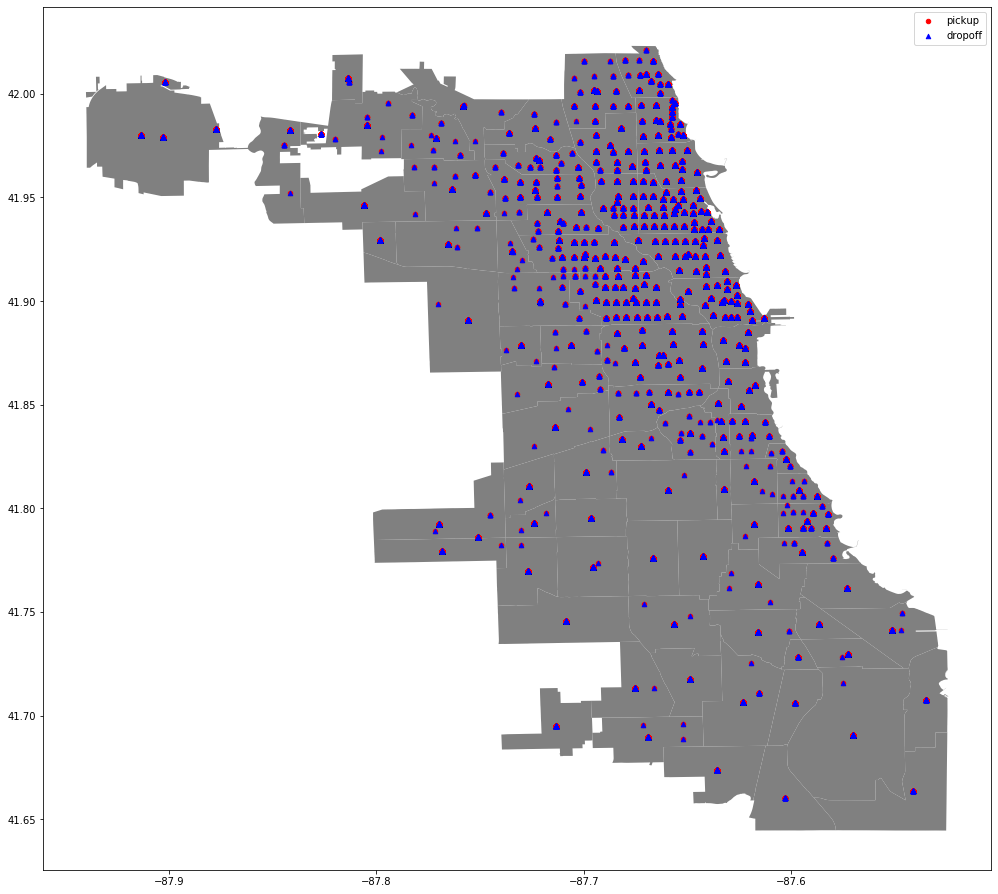

In [77]:
fig,ax=plt.subplots(figsize=(17,17))
map1.plot(ax=ax,color='grey')
geodf.plot(ax=ax,markersize=20,color='red',marker="o",label='pickup')
geodf2.plot(ax=ax,markersize=20,color='blue',marker="^",label='dropoff')
plt.legend(prop={'size':10})
#chicago is located in northeast here

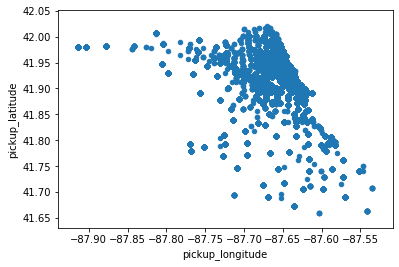

In [78]:
df.plot(kind='scatter',x='pickup_longitude',y='pickup_latitude')
#just to better show the density

### From the previous charts, overall majority of rides and business occur in Chicago, which makes sense. Pickup and dropoff locations are pretty close to one another

In [79]:
df['pickup_latitude_cut']=pd.cut(df.pickup_latitude, bins=(41,41.75,41.8,41.85,41.9,42,45))

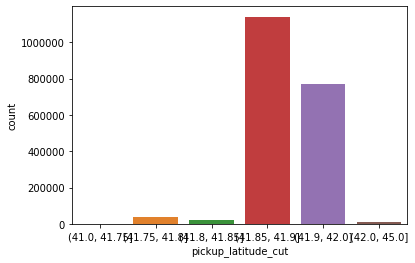

In [80]:
sns.countplot(x='pickup_latitude_cut',data=df)

### Trips that start south of Chicago are about twice as long in length and seconds

C:\Users\Robby Konrath\Documents\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


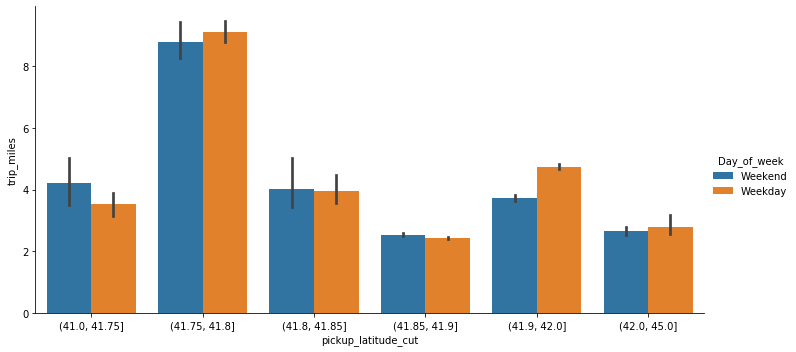

In [81]:
sns.catplot(x='pickup_latitude_cut',y='trip_miles',hue='Day_of_week',kind='bar',data=df,aspect=2)

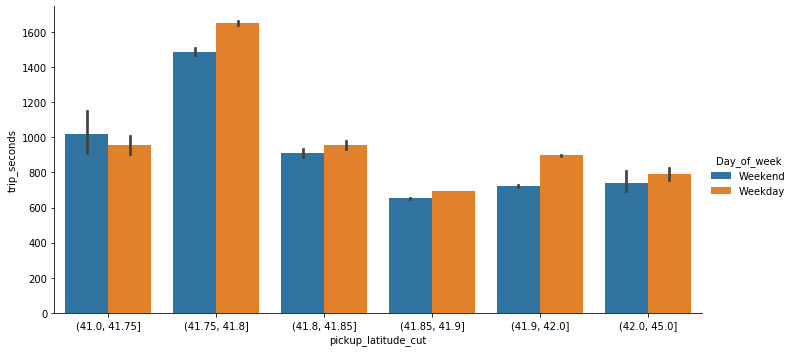

In [82]:
sns.catplot(x='pickup_latitude_cut',y='trip_seconds',hue='Day_of_week',kind='bar',data=df,aspect=2)

In [104]:
dfr=df.copy()

In [105]:
dfr=dfr[(dfr.trip_seconds!=0) & (dfr.fare!=0) & (dfr.trip_miles!=0)]
#can't compute next things with zero in denom and also these trips don't make sense in the data anyway 

In [106]:
dfr['miles_per_sec']=dfr.trip_miles/dfr.trip_seconds

In [107]:
dfr['revenue_per_sec']=dfr.trip_total/dfr.trip_seconds

In [108]:
dfr.groupby('pickup_latitude_cut')['miles_per_sec'].mean()

pickup_latitude_cut
(41.0, 41.75]    0.004211
(41.75, 41.8]    0.015632
(41.8, 41.85]    0.013578
(41.85, 41.9]    0.005096
(41.9, 42.0]     0.008975
(42.0, 45.0]     0.005889
Name: miles_per_sec, dtype: float64

### Revenue per sec while driving is about the same, however miles per second is about 3 times as much in south of Chicago than in Chicago probably due to traffic

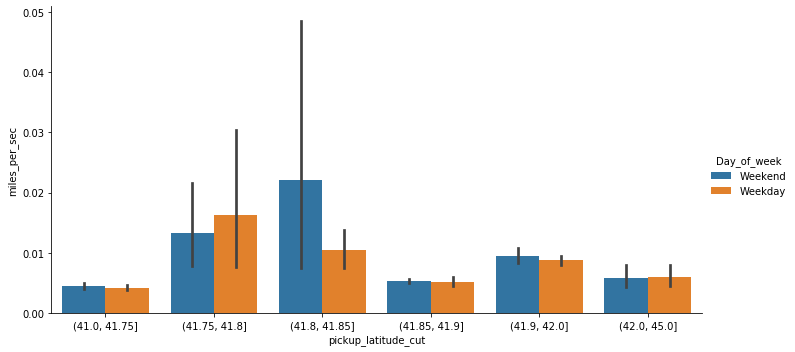

In [109]:
sns.catplot(x='pickup_latitude_cut',y='miles_per_sec',hue='Day_of_week',kind='bar',data=dfr,aspect=2)

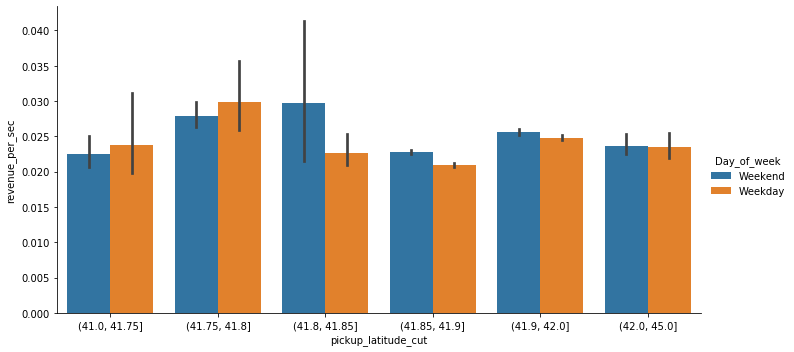

In [110]:
sns.catplot(x='pickup_latitude_cut',y='revenue_per_sec',hue='Day_of_week',kind='bar',data=dfr,aspect=2)

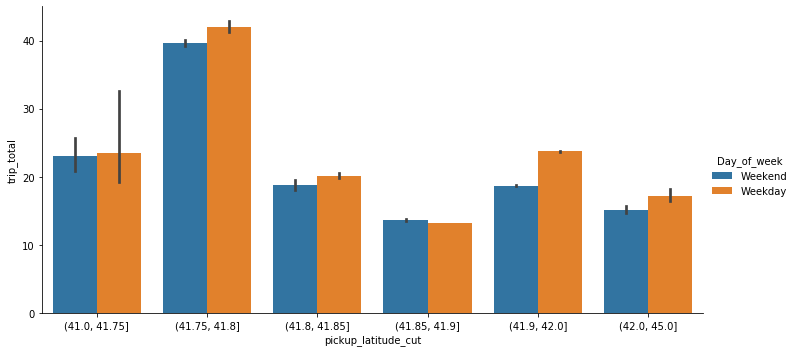

In [111]:
sns.catplot(x='pickup_latitude_cut',y='trip_total',hue='Day_of_week',kind='bar',data=dfr,aspect=2)

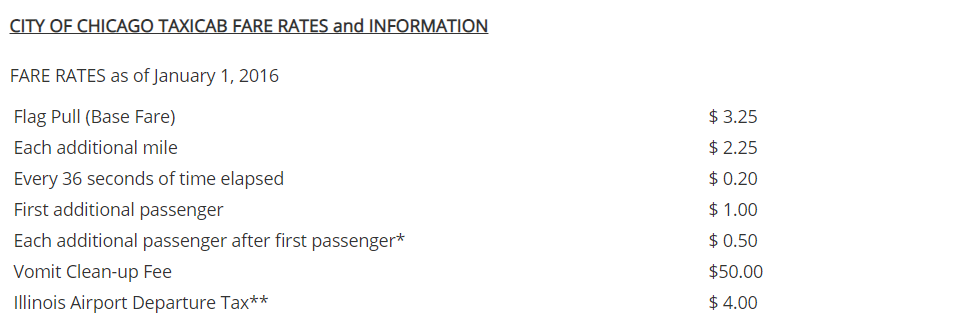

In [211]:
dfr.corr()

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,miles_per_sec,revenue_per_sec
trip_seconds,1.000000,0.146204,0.492061,0.373588,0.052337,0.061618,0.456733,0.143157,-0.349346,0.099590,-0.277108,-0.005110,-0.024252
trip_miles,0.146204,1.000000,0.159253,0.128814,0.010130,0.026133,0.151694,0.061575,-0.134848,0.033247,-0.093489,0.093712,0.041570
fare,0.492061,0.159253,1.000000,0.395156,0.126310,0.080207,0.863330,0.157635,-0.382449,0.105572,-0.296665,0.017348,0.181139
tips,0.373588,0.128814,0.395156,1.000000,0.029002,0.088725,0.469388,0.138379,-0.404057,0.076015,-0.229659,-0.000954,0.022293
tolls,0.052337,0.010130,0.126310,0.029002,1.000000,0.018930,0.117353,0.024391,-0.041887,0.000096,-0.003083,0.000173,0.011397
extras,0.061618,0.026133,0.080207,0.088725,0.018930,1.000000,0.560255,0.047889,-0.120160,0.002274,-0.007555,0.001213,0.165034
trip_total,0.456733,0.151694,0.863330,0.469388,0.117353,0.560255,1.000000,0.162219,-0.403530,0.092012,-0.261152,0.013939,0.223909
pickup_latitude,0.143157,0.061575,0.157635,0.138379,0.024391,0.047889,0.162219,1.000000,-0.574339,0.319673,-0.111295,0.000297,0.006844
pickup_longitude,-0.349346,-0.134848,-0.382449,-0.404057,-0.041887,-0.120160,-0.403530,-0.574339,1.000000,-0.110881,0.081720,-0.004878,-0.017655
dropoff_latitude,0.099590,0.033247,0.105572,0.076015,0.000096,0.002274,0.092012,0.319673,-0.110881,1.000000,-0.496864,-0.000427,0.002920


### By utilizing the above information found on chicago.gov site, we can figure out how important each attribute is to how much money one cab driver can make

In [112]:
dfr.groupby('pickup_latitude_cut')['trip_seconds'].mean()

pickup_latitude_cut
(41.0, 41.75]    1151.425278
(41.75, 41.8]    1738.547708
(41.8, 41.85]    1117.709333
(41.85, 41.9]     725.941954
(41.9, 42.0]     1055.988029
(42.0, 45.0]      947.337165
Name: trip_seconds, dtype: float64

In [113]:
dfr.groupby('pickup_latitude_cut')['trip_miles'].mean()

pickup_latitude_cut
(41.0, 41.75]     5.102925
(41.75, 41.8]    10.766452
(41.8, 41.85]     5.206710
(41.85, 41.9]     3.070094
(41.9, 42.0]      6.214986
(42.0, 45.0]      3.978511
Name: trip_miles, dtype: float64

In [114]:
print ('The amount of rides one driver can do in Chicago versus south is ' + str(1698/694))
print ('The base rate amount for one ride south of Chicago is 3.25')
print ('The base rate amount for one ride in Chicago for as many trips as south of Chicago is ' + str(1698/694*3.25))


The amount of rides one driver can do in Chicago versus south is 2.446685878962536
The base rate amount for one ride south of Chicago is 3.25
The base rate amount for one ride in Chicago for as many trips as south of Chicago is 7.9517291066282425


In [115]:
print ('The amount made total from miles south of Chicago would be ' + str(9.54*2.25))
print ('The amount made total from miles in Chicago would be ' + str(2.49*2.25))

The amount made total from miles south of Chicago would be 21.464999999999996
The amount made total from miles in Chicago would be 5.602500000000001


In [116]:
print ('The amount made total from trip seconds south of Chicago would be ' + str(1698.329/36*.2))
print ('The amount made total from trip seconds in Chicago would be ' + str(694.98/36*.2))

The amount made total from trip seconds south of Chicago would be 9.435161111111112
The amount made total from trip seconds in Chicago would be 3.861


In [117]:
print ('Most one could make in one trip on average south of Chicago is ' + str(3.25+21.465+9.4))
print ('Most one could make in Chicago on average compared to one trip south of Chicago is ' + str(7.95+5.6+3.86))

Most one could make in one trip on average south of Chicago is 34.115
Most one could make in Chicago on average compared to one trip south of Chicago is 17.41


### Traveling many miles fast is the best

## Finding

Based on Chicago Taxi Cab Data most business is in Chicago, but can make much more per ride south of Chicago (about double based on rates). Also, day of week seems to have little effect

## Insight

Large companies should stay in Chicago to maximize business opportunties due to many people. However, because long trips mainly occur south of Chicago and they are usually pretty fast, individual cab drivers may want to begin their trips South of Chicago to maximize total profit.

# Finding 2- Taxi Efficiency Based on Time of Day 

In [118]:
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,...,pickup_longitude,dropoff_latitude,dropoff_longitude,date_start,time_start,date_end,time_end,Day_of_week,geometry,pickup_latitude_cut
0,4016,2016-2-13 17:15:00,2016-2-13 17:45:00,1080.0,2.8,8,28,12.75,2.0,0.0,...,-87.626215,41.879255,-87.642649,2016-2-13,17:15:00,2016-2-13,17:45:00,Weekend,POINT (-87.642648998 41.879255084),"(41.85, 41.9]"
1,4387,2016-6-16 20:30:00,2016-6-16 20:30:00,300.0,0.5,24,24,5.00,0.0,0.0,...,-87.670945,41.906026,-87.675312,2016-6-16,20:30:00,2016-6-16,20:30:00,Weekday,POINT (-87.675311622 41.906025969),"(41.9, 42.0]"
2,4865,2016-7-14 15:45:00,2016-7-14 16:15:00,2340.0,11.0,28,56,30.50,6.2,0.0,...,-87.642649,41.785999,-87.750934,2016-7-14,15:45:00,2016-7-14,16:15:00,Weekday,POINT (-87.750934289 41.785998518),"(41.85, 41.9]"
3,727,2016-3-14 03:00:00,2016-3-14 03:00:00,420.0,0.0,6,3,7.50,0.0,0.0,...,-87.655998,41.965812,-87.655879,2016-3-14,03:00:00,2016-3-14,03:00:00,Weekday,POINT (-87.655878786 41.96581197),"(41.9, 42.0]"
4,2452,2016-11-16 21:15:00,2016-11-16 21:15:00,600.0,1.6,Unknown,Unknown,8.25,3.0,0.0,...,-87.659032,41.900886,-87.653736,2016-11-16,21:15:00,2016-11-16,21:15:00,Weekday,POINT (-87.65373579490085 41.90088553772139),"(41.9, 42.0]"


Prepare dummies for time of day

In [119]:
dft=df.copy()

In [120]:
dft['starthour']=dft.time_start.str[0:2]

In [121]:
dft['starthour'] = dft.starthour.astype(int)

In [122]:
dft['time_0-6'] = dft.starthour.apply(lambda x: 1.0 if x<=6 else 0.0)

In [123]:
dft['time_6-12'] = dft.starthour.apply(lambda x: 1.0 if (x<=12 & x>6) else 0.0)

In [124]:
dft['time_12-18'] = dft.starthour.apply(lambda x: 1.0 if (x<=18 & x>12) else 0.0)

In [125]:
dft['time_18-24'] = dft.starthour.apply(lambda x: 1.0 if x>18 else 0.0)

In [126]:
dft.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,...,date_end,time_end,Day_of_week,geometry,pickup_latitude_cut,starthour,time_0-6,time_6-12,time_12-18,time_18-24
0,4016,2016-2-13 17:15:00,2016-2-13 17:45:00,1080.0,2.8,8,28,12.75,2.0,0.0,...,2016-2-13,17:45:00,Weekend,POINT (-87.642648998 41.879255084),"(41.85, 41.9]",17,0.0,0.0,0.0,0.0
1,4387,2016-6-16 20:30:00,2016-6-16 20:30:00,300.0,0.5,24,24,5.00,0.0,0.0,...,2016-6-16,20:30:00,Weekday,POINT (-87.675311622 41.906025969),"(41.9, 42.0]",20,0.0,0.0,0.0,1.0
2,4865,2016-7-14 15:45:00,2016-7-14 16:15:00,2340.0,11.0,28,56,30.50,6.2,0.0,...,2016-7-14,16:15:00,Weekday,POINT (-87.750934289 41.785998518),"(41.85, 41.9]",15,0.0,0.0,0.0,0.0
3,727,2016-3-14 03:00:00,2016-3-14 03:00:00,420.0,0.0,6,3,7.50,0.0,0.0,...,2016-3-14,03:00:00,Weekday,POINT (-87.655878786 41.96581197),"(41.9, 42.0]",3,1.0,0.0,0.0,0.0
4,2452,2016-11-16 21:15:00,2016-11-16 21:15:00,600.0,1.6,Unknown,Unknown,8.25,3.0,0.0,...,2016-11-16,21:15:00,Weekday,POINT (-87.65373579490085 41.90088553772139),"(41.9, 42.0]",21,0.0,0.0,0.0,1.0


Prepare for clustering analysis

In [127]:
from sklearn.cluster import KMeans

In [128]:
clu = KMeans(n_clusters=3, random_state=0, max_iter=3000)

In [130]:
dft=dft.drop(['taxi_id','trip_start_timestamp','trip_end_timestamp','pickup_community_area','dropoff_community_area',\
         'payment_type','company','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude',\
         'date_start', 'time_start', 'date_end', 'time_end',\
        'Day_of_week', 'geometry', 'pickup_latitude_cut'],axis=1)

In [131]:
dft=dft[(dft.trip_seconds!=0) & (dft.fare!=0)]
#can't compute next items with zero in denom

Create variable for whether or not a customer tips

In [132]:
dft['tipper']=dft.tips.apply(lambda x: 1.0 if x>0 else 0.0)

In [141]:
dft.head()

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,starthour,time_0-6,time_6-12,time_12-18,time_18-24,tipper,miles_per_sec,cluster
0,1080.0,2.8,12.75,2.0,0.0,1.0,15.75,17,0.0,0.0,0.0,0.0,1.0,0.002593,0
1,300.0,0.5,5.00,0.0,0.0,1.0,6.00,20,0.0,0.0,0.0,1.0,0.0,0.001667,0
2,2340.0,11.0,30.50,6.2,0.0,0.0,37.20,15,0.0,0.0,0.0,0.0,1.0,0.004701,2
3,420.0,0.0,7.50,0.0,0.0,1.5,9.00,3,1.0,0.0,0.0,0.0,0.0,0.000000,0
4,600.0,1.6,8.25,3.0,0.0,1.0,12.25,21,0.0,0.0,0.0,1.0,1.0,0.002667,0


Create efficieny variable of trip revenue/trip time

In [142]:
dft['revenue_per_sec']=dft.trip_total/dft.trip_seconds

In [143]:
dft['miles_per_sec']=dft.trip_miles/dft.trip_seconds

In [144]:
clu

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=3000,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [145]:
clu.fit(dft)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=3000,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [146]:
clu.labels_

array([0, 0, 2, ..., 0, 0, 0])

In [147]:
dft['cluster'] = clu.labels_

In [148]:
dft.groupby('cluster').mean()

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,starthour,time_0-6,time_6-12,time_12-18,time_18-24,tipper,miles_per_sec,revenue_per_sec
cluster,,,,,,,,,,,,,,,
0,594.985004,2.208847,10.033706,1.082239,0.001612,0.706507,11.873733,13.664939,0.143915,0.089942,0.118803,0.276742,0.401733,0.005626,0.024912
1,52102.507194,13.187302,72.511583,1.132698,0.865108,0.678777,75.241223,12.082734,0.104317,0.169065,0.075540,0.118705,0.223022,0.000304,0.001663
2,2421.573478,13.712285,39.445912,4.991370,0.010737,3.458138,47.990896,14.413481,0.057451,0.096227,0.167396,0.212348,0.593480,0.006005,0.020996


Clusters 0 and 2 have the most efficiency and have the highest portions of their rides occuring in the time 0-6 and time 18-24 slots. These slots tend to have much lower trip times and and trip times suggesting that shorter trips may be more efficient

In [149]:
dft['rev_sec_bin']=pd.qcut(dft.revenue_per_sec, 5)

In [150]:
dft['timebin']=pd.cut(dft.starthour, bins=[0,6,12,18,24])

C:\Users\Robby Konrath\Documents\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


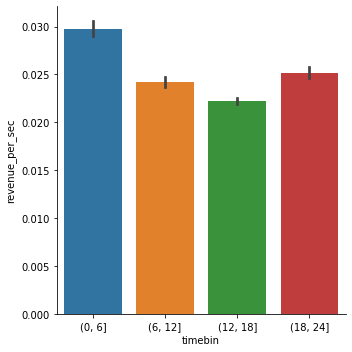

In [151]:
sns.catplot(y='revenue_per_sec',x='timebin', kind='bar', data=dft)

20% faster^

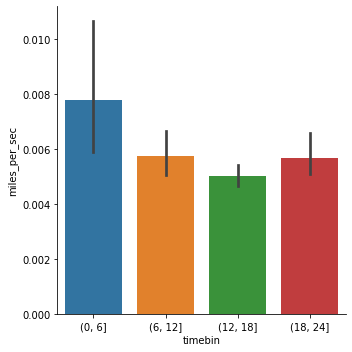

In [152]:
sns.catplot(y='miles_per_sec',x='timebin', kind='bar', data=dft)

33% faster^

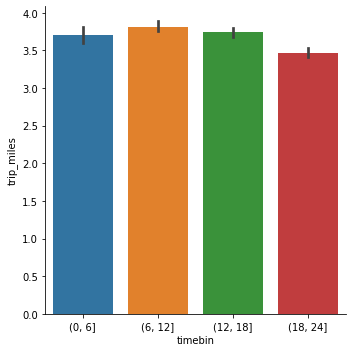

In [153]:
sns.catplot(y='trip_miles',x='timebin', kind='bar', data=dft)

^same amount of miles usually

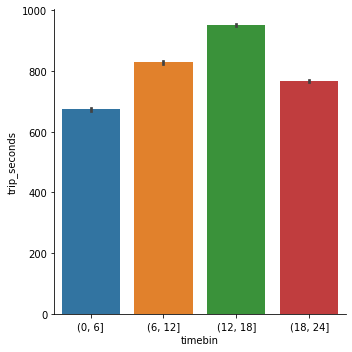

In [154]:
sns.catplot(y='trip_seconds',x='timebin', kind='bar', data=dft)

^much faster to go those miles

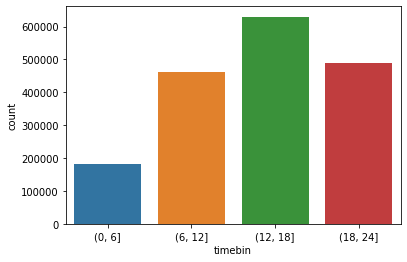

In [155]:
sns.countplot(x='timebin',data=dft)

### Summary

Rides that occur between the hours of midnight to 6am and 6pm to midnight tend to be the most efficient in terms of revenue per second of ride time as well as miles per second. Miles per second is faster and rides that drive a large amount of miles fast tend to make the most as we know from finding one

### Insight

Taxis that want to make money most efficiently should operate between 6pm and 6am rather than more normal business hours. However, after 6 pm may be best due to volume of people out

## Finding 3- Credit Card Users and Tips

### Most people use cash or credit cards to pay

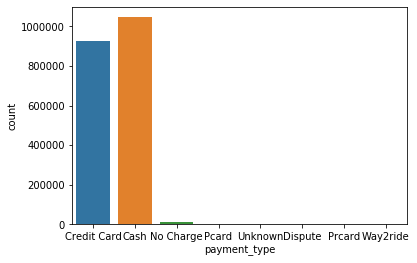

In [196]:
sns.countplot(x='payment_type',data=df)

In [188]:
dfm=df.copy()

In [189]:
dfm = dfm[(dfm.payment_type == 'Cash') | (dfm.payment_type == 'Credit Card')]

In [190]:
dfm2 = dfm[['payment_type', 'trip_total', 'trip_miles','tips']]

In [191]:
dfm2 = dfm2[dfm2.trip_miles != 0]

In [192]:
dfm2['binned_tripmiles']=pd.qcut(dfm2.trip_miles, 5)

C:\Users\Robby Konrath\Documents\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


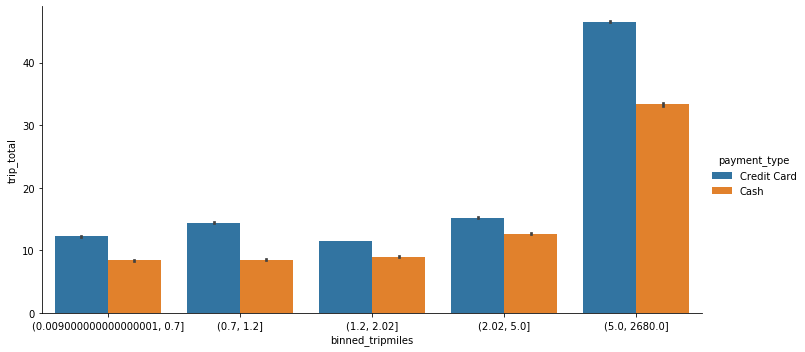

In [193]:
sns.catplot(y='trip_total', data=dfm2, x='binned_tripmiles', aspect=2, kind='bar', hue = 'payment_type')

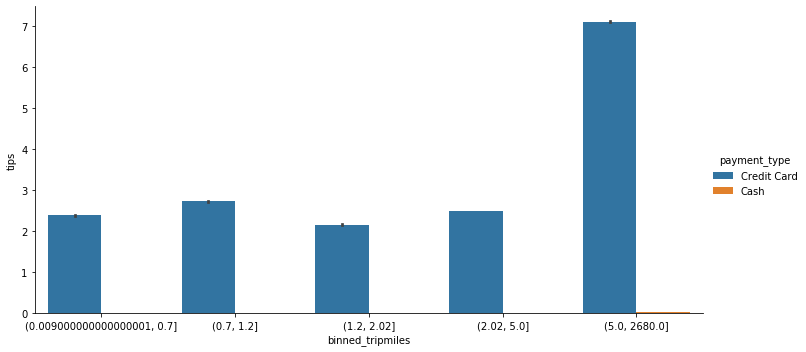

In [194]:
sns.catplot(y='tips', data=dfm2, x='binned_tripmiles', aspect=2, kind='bar', hue = 'payment_type')

#### 44% of people tip and almost all of them pay with credit card

In [204]:
len(dfm2[dfm2.tips>0])/ len(dfm2)

0.44015399343617195

In [208]:
len(dfm2[(dfm2.tips>0) & (dfm2.payment_type=='Credit Card')])/len(dfm2)

0.4396250790065929

In [210]:
len(dfm2[dfm2.tips>0])

665747

In [209]:
len(dfm2[(dfm2.tips>0) & (dfm2.payment_type=='Credit Card')])

664947

#### 11% of total consumers tip when miles is less than 1 so they are many tips to get on shorter trips

In [205]:
len(dfm2[(dfm2.tips>0) & (dfm2.trip_miles<1)]) / len(dfm2) 

0.11060261865534085

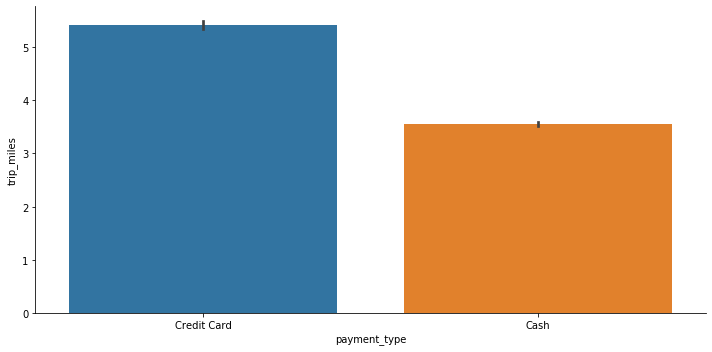

In [195]:
sns.catplot(x='payment_type',y='trip_miles',kind='bar',data=dfm2,aspect=2)

### Summary

The first barplot shows the relationship between trip_miles and trip_total paid with hues on Credit and Cash. The trip_miles are binned with equal frequencies. Credit card payments tended to range higher than cash payments for all distances.

The second barplot shows that Credit Card users tip much more than cash users. 

Credit card users tend to both pay more for every binned distance traveled and on average have a longer trip distance

Also, credit card users may see a screen with a tip amount when swiping that could lead them to tip more

### Insight

This leads us to say that credit card users are more likely to tip so all taxi companies should incentivize credit card payments with some sort of discount program to capitalize on improving how much money they can make, especially on shorter ride lengths as these don't always make the most money for taxi drivers as we saw from the first finding.